In [1]:
from pathlib import Path

import anndata as ad
from IPython.core.interactiveshell import InteractiveShell

from subcluster import (
    plot_clustering_heatmap_2,
    run_clustering,
    ClusteringResult,
    ClusteringResultManager,
    update_geojson_from_clustering_result,
)

InteractiveShell.ast_node_interactivity = "all"


# Demo Data


In [2]:
adata = ad.read_h5ad("input/data_demo.h5ad")[0:1000].copy()
adata

AnnData object with n_obs × n_vars = 1000 × 46
    obs: 'id', 'cellLabel', 'cellSize', 'Y_cent', 'X_cent', 'tma'

In [3]:
# single cell data
adata.X
adata.to_df().head()

array([[3.36001928e-01, 8.51124647e-02, 3.07375298e-01, ...,
        1.95495360e-03, 0.00000000e+00, 9.63720695e-04],
       [2.46858923e-01, 4.89802643e-04, 0.00000000e+00, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       [0.00000000e+00, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       ...,
       [6.91708254e-02, 1.99898512e-02, 1.16875698e-01, ...,
        2.26652879e-03, 1.28645558e-03, 1.30542269e-03],
       [5.22985221e-01, 3.12477095e-01, 3.30165374e-01, ...,
        1.61331732e-03, 2.39572690e-03, 7.09762954e-04],
       [2.74424259e-01, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 2.39572690e-03, 1.30542269e-03]])

,DAPI,CD45,CD3e,CD8,CD4,CD45RO,CD45RA,CD69,CD57,CD56,...,P53,CD31,Podoplanin,aSMA,NaKATP,VDAC1,ATP5A,GLUT1,G6PD,CD68
cell_id,,,,,,,,,,,,,,,,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,0.336002,0.085112,0.307375,0.070482,0.000273,0.540095,0.000000,0.000881,0.001268,0.000000,...,0.002346,0.001642,0.002723,0.001407,0.000000,0.089605,0.442195,0.001955,0.000000,0.000964
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,0.246859,0.000490,0.000000,0.000087,0.000588,0.000000,0.000621,0.001371,0.001490,0.000131,...,0.003231,0.000103,0.000250,1.000000,0.001021,0.000417,0.210098,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,0.000000,0.000490,0.000836,0.000573,0.001460,0.005088,0.000621,0.001371,0.001490,0.000000,...,0.000547,0.001642,0.002982,1.000000,0.000373,0.000348,0.052819,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0.784460,0.431749,0.576645,0.056420,0.057027,0.792592,0.000621,0.001033,0.001329,0.000265,...,0.003281,0.001300,0.001172,0.000321,0.138844,0.015125,0.279266,0.002056,0.000000,0.000936
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,0.040196,0.000490,0.005417,0.000154,0.000811,0.001315,0.000078,0.001371,0.001490,0.000775,...,0.000005,0.103594,0.002982,0.779664,0.000000,0.000452,0.111498,0.002267,0.000035,0.001305


In [4]:
# metadata
adata.obs.head()

,id,cellLabel,cellSize,Y_cent,X_cent,tma
cell_id,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,2,173,4.069364,2776.838150,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,5,191,5.188482,3305.136126,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,6,162,4.543210,3637.746914,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,7,346,5.956647,2798.722543,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,9,355,5.839437,3169.946479,TMA609


# Preparation

In [5]:
# Output directory
output_dir = "/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# markers for clustering
markers_all = [
    "CD45",
    "CD3e",
    "CD8",
    "CD4",
    "FoxP3",
    "CD20",
    "CD68",
    "CD163",
    "CD16",
    "CD11b",
    "MPO",
    "Cytokeratin",
    "CD31",
    "Podoplanin",
    "aSMA",
]
markers_t = ["CD3e", "CD8", "CD4", "FoxP3"]
markers_b = ["CD20"]
markers_m = ["CD16", "CD163", "CD68"]
# and so on


# Initial Clustering

## Clustering with Phenograph

In [6]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# if no clustering results, you can use all cells for the first clustering

No clustering results found.


In [7]:
unit_ids = adata.obs.index  # use all cells
features = markers_all  # markers for clustering

# clustering using phenograph
clustering_result = run_clustering(
    adata, unit_ids, features, method="phenograph", method_params={"k": 50}
)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.02943587303161621 seconds
Jaccard graph constructed in 0.23520946502685547 seconds
Wrote graph to binary file in 0.016562223434448242 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.78721
Louvain completed 21 runs in 0.24400973320007324 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.6772034168243408 seconds


In [8]:
# clustering result
clustering_result.cluster_df

,clustering_id,method,unit_ids,cluster_ids
0,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,5
1,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,2
2,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,2
3,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0
4,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,4
...,...,...,...,...
995,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,1
996,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,1
997,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,0
998,a4cb36c5-4299-4c67-9ef4-389866c256fe,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,0


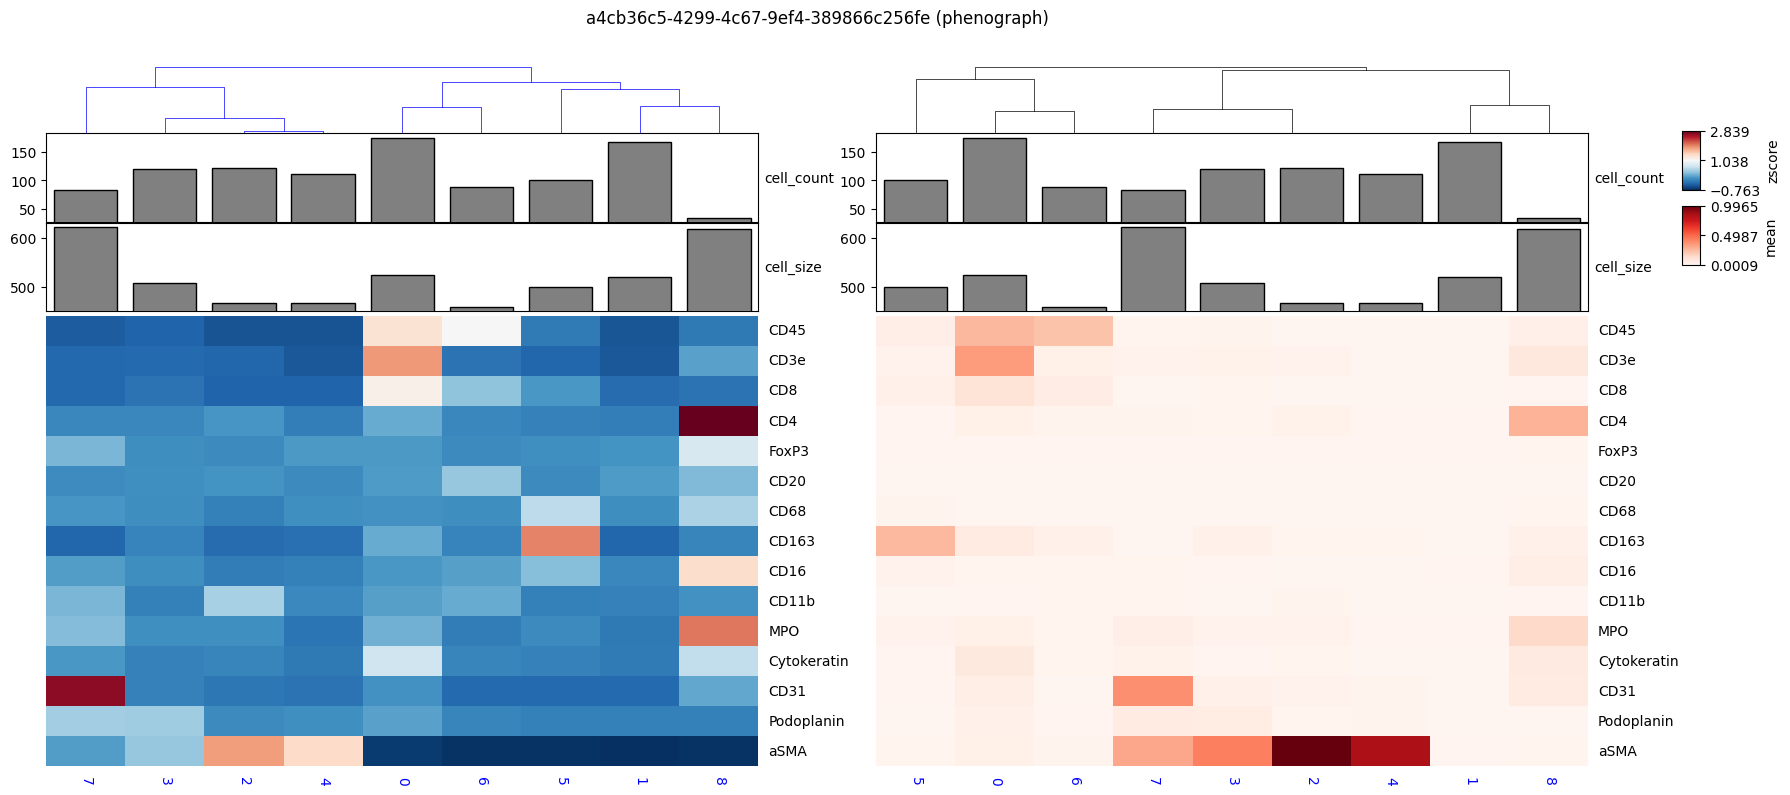

In [9]:
# plot heatmap without value limit
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
)

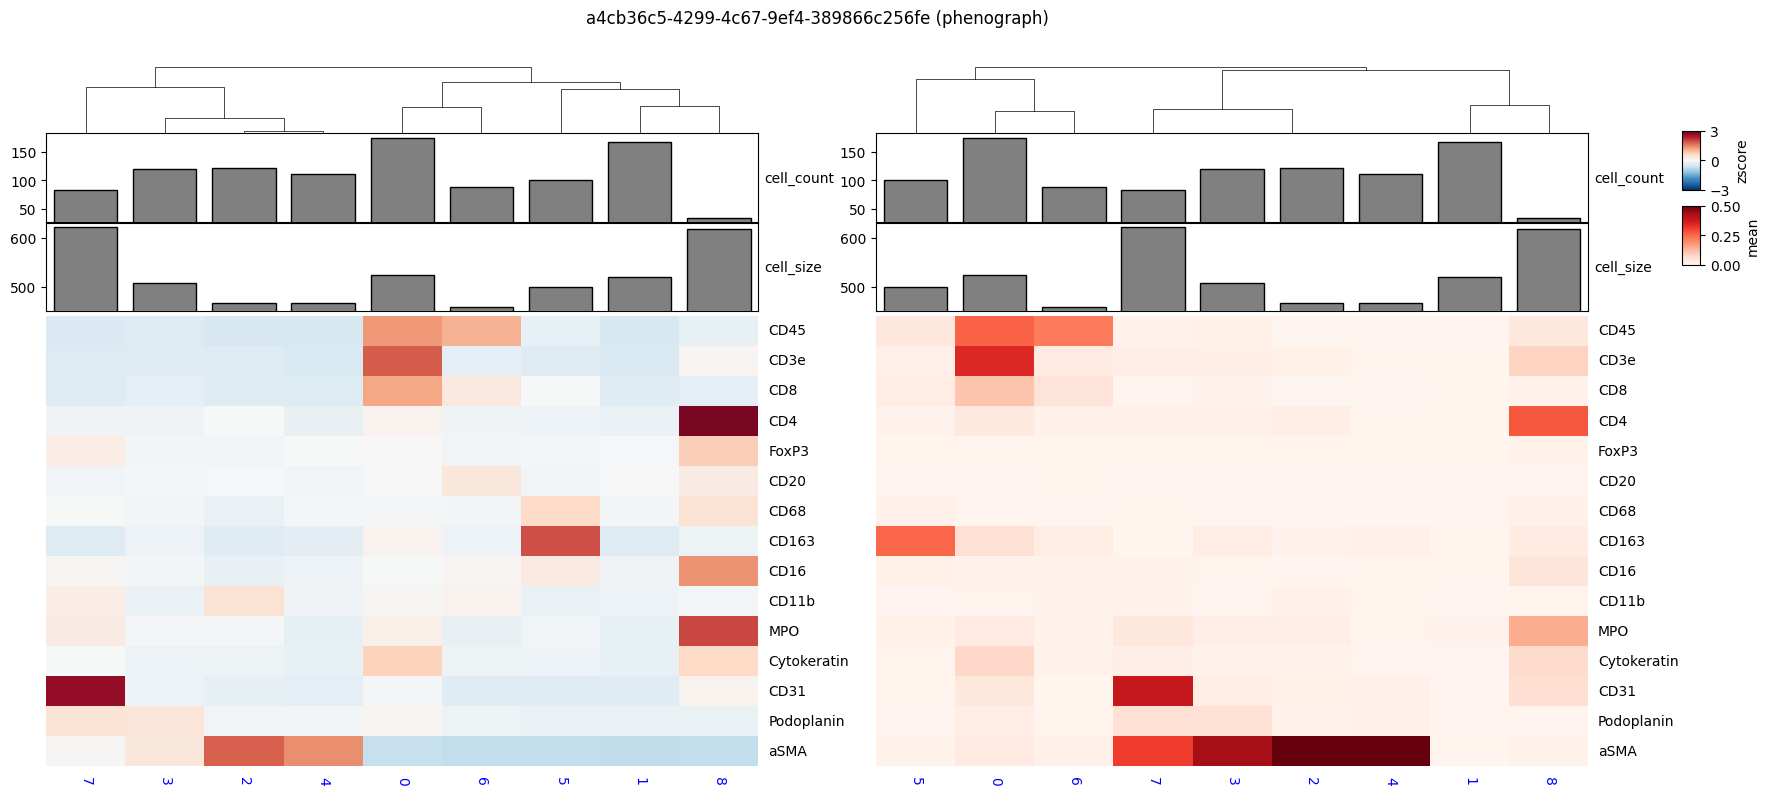

In [10]:
# plot heatmap with value limit
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)

In [ ]:
# generate geojson to visualize the clustering result
clustering_result = ClusteringResult.from_csv(
    "output/clustering_demo/clustering_results/6eb6f82a-804b-4972-af5e-ff5970d47366.csv"
)
geojson_file = Path(
    "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/20250324_update_geojson_R/geojson/RCC-TMA609(reg_4x5)-dst=reg019-src=reg005.geojson"
)
update_geojson_from_clustering_result(geojson_file, clustering_result, output_dir)


In [11]:
# for explicit clusters, add annotation
# units with annotation will be skipped for next clustering
clustering_result.add_annotation(
    {"1": "Endothelial", "2": "Muscle-like", "3": "Endothelial"},
)

# for explicit clusters, it is recommended to add tag
# tag will be helpful for selecting units for next clustering
clustering_result.add_tag(
    {"4": "T_M", "5": "T_B", "6": "T_M", "7": "T_B", "8": "T_M", "0": "T_B"},
    tag_name="tag",
)

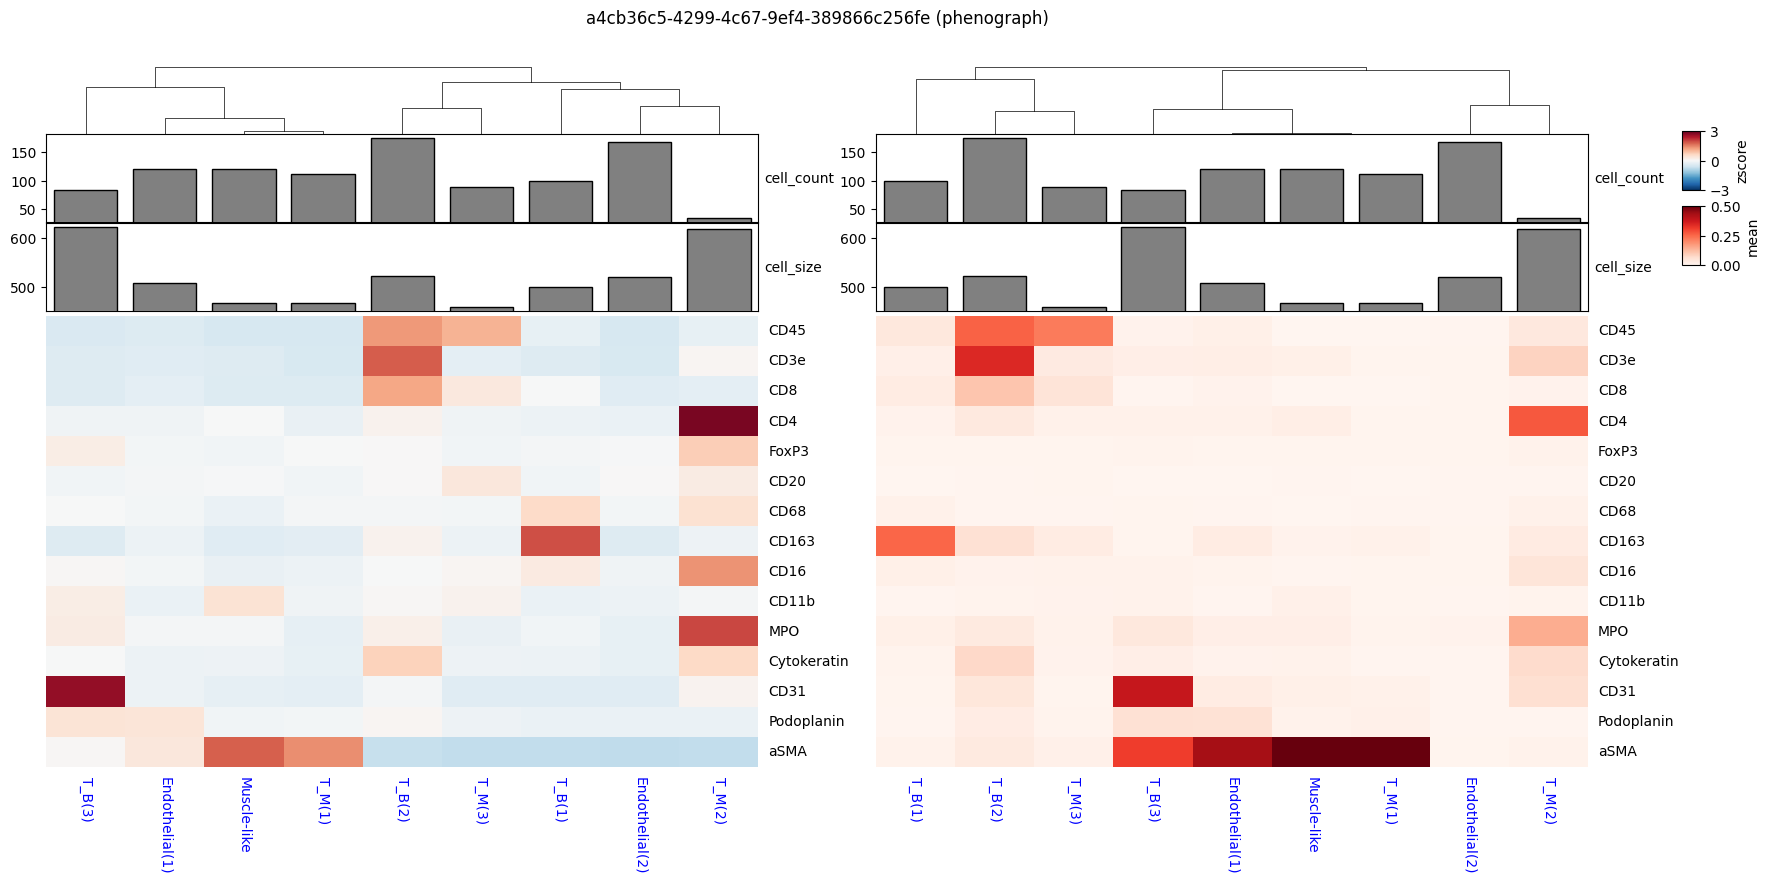

In [12]:
# plot heatmap with updated annotations and tags
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [13]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 1

In [14]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# summary of clustering results
manager.summary_df

,a4cb36c5-4299-4c67-9ef4-389866c256fe,latest_cluster_id,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,5,5,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,2,2,Muscle-like,a4cb36c5-4299-4c67-9ef4-389866c256fe,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,2,2,Muscle-like,a4cb36c5-4299-4c67-9ef4-389866c256fe,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,4,4,,,T_M
...,...,...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,1,1,Endothelial,a4cb36c5-4299-4c67-9ef4-389866c256fe,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,1,1,Endothelial,a4cb36c5-4299-4c67-9ef4-389866c256fe,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,0,0,,,T_B


In [15]:
# cells with no annotation need to be subclustered
manager.non_explicit_df

# tag will be helpful for selecting units for next clustering
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_M'").index
unit_ids

,a4cb36c5-4299-4c67-9ef4-389866c256fe,latest_cluster_id,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,5,5,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,4,4,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c10,4,4,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c11,7,7,,,T_B
...,...,...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1737,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1742,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1745,0,0,,,T_B
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,0,0,,,T_B


tag
T_B    358
T_M    234
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c10',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c27',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c34',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c37',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c75',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c104',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c117',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c132',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c143',
       ...
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1541',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1581',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1588',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1603',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1628',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1648',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1672',
       'RCC-TMA609(r

In [16]:
# clustering using phenograph with T and Macrophage markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_t + markers_m,
    method="phenograph",
    method_params={"k": 50},
)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.016591548919677734 seconds
Jaccard graph constructed in 0.21079540252685547 seconds
Wrote graph to binary file in 0.004541635513305664 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.553793
Louvain completed 21 runs in 0.11311864852905273 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.5329282283782959 seconds


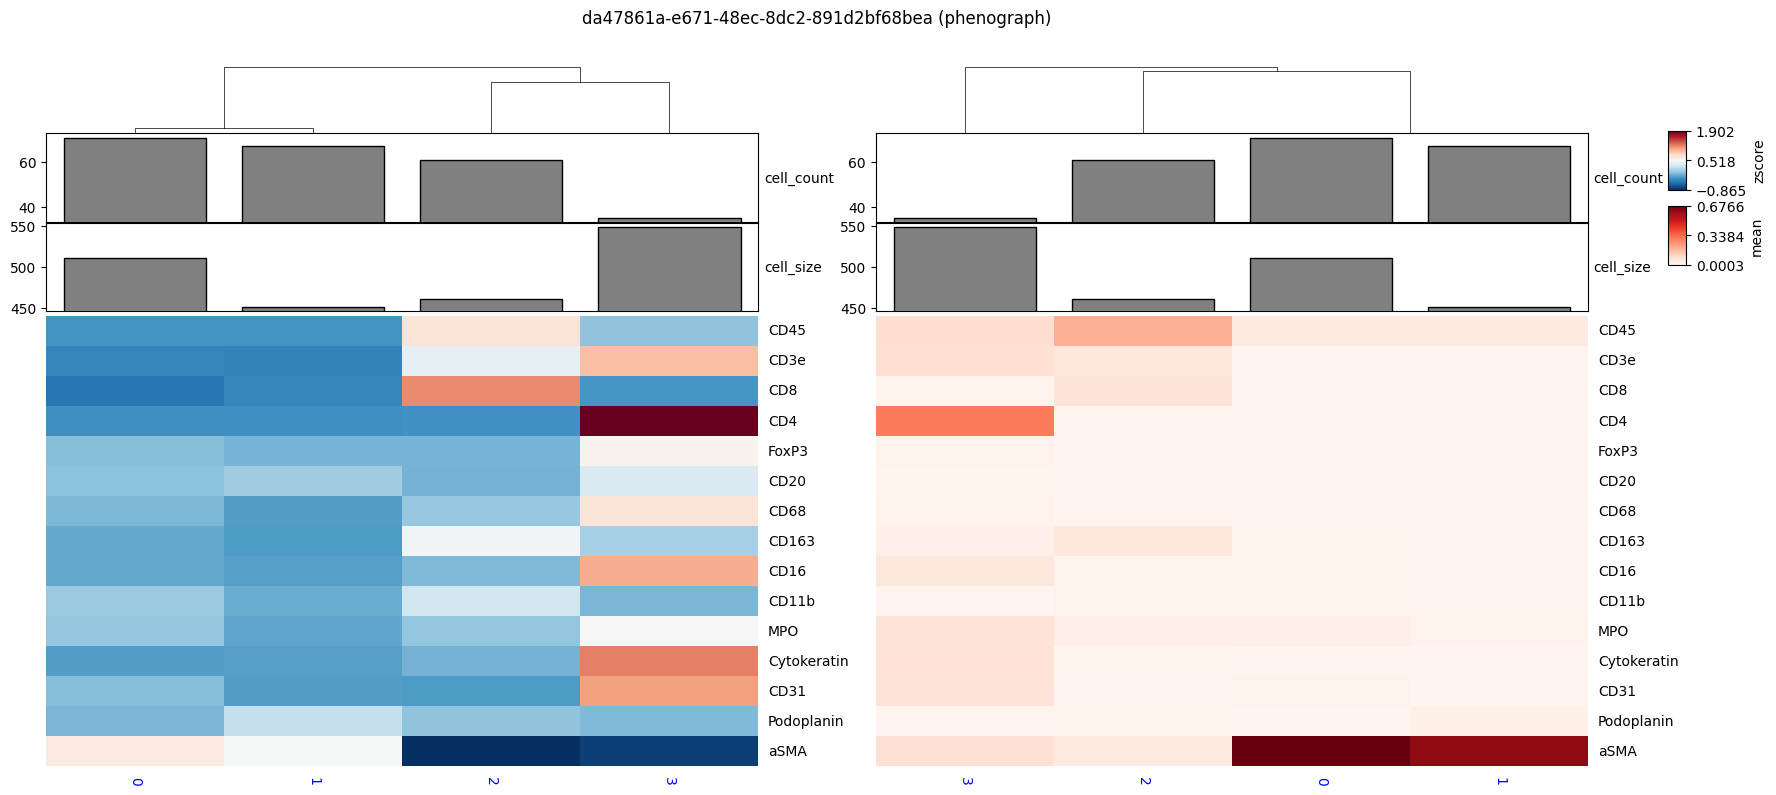

In [17]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
)


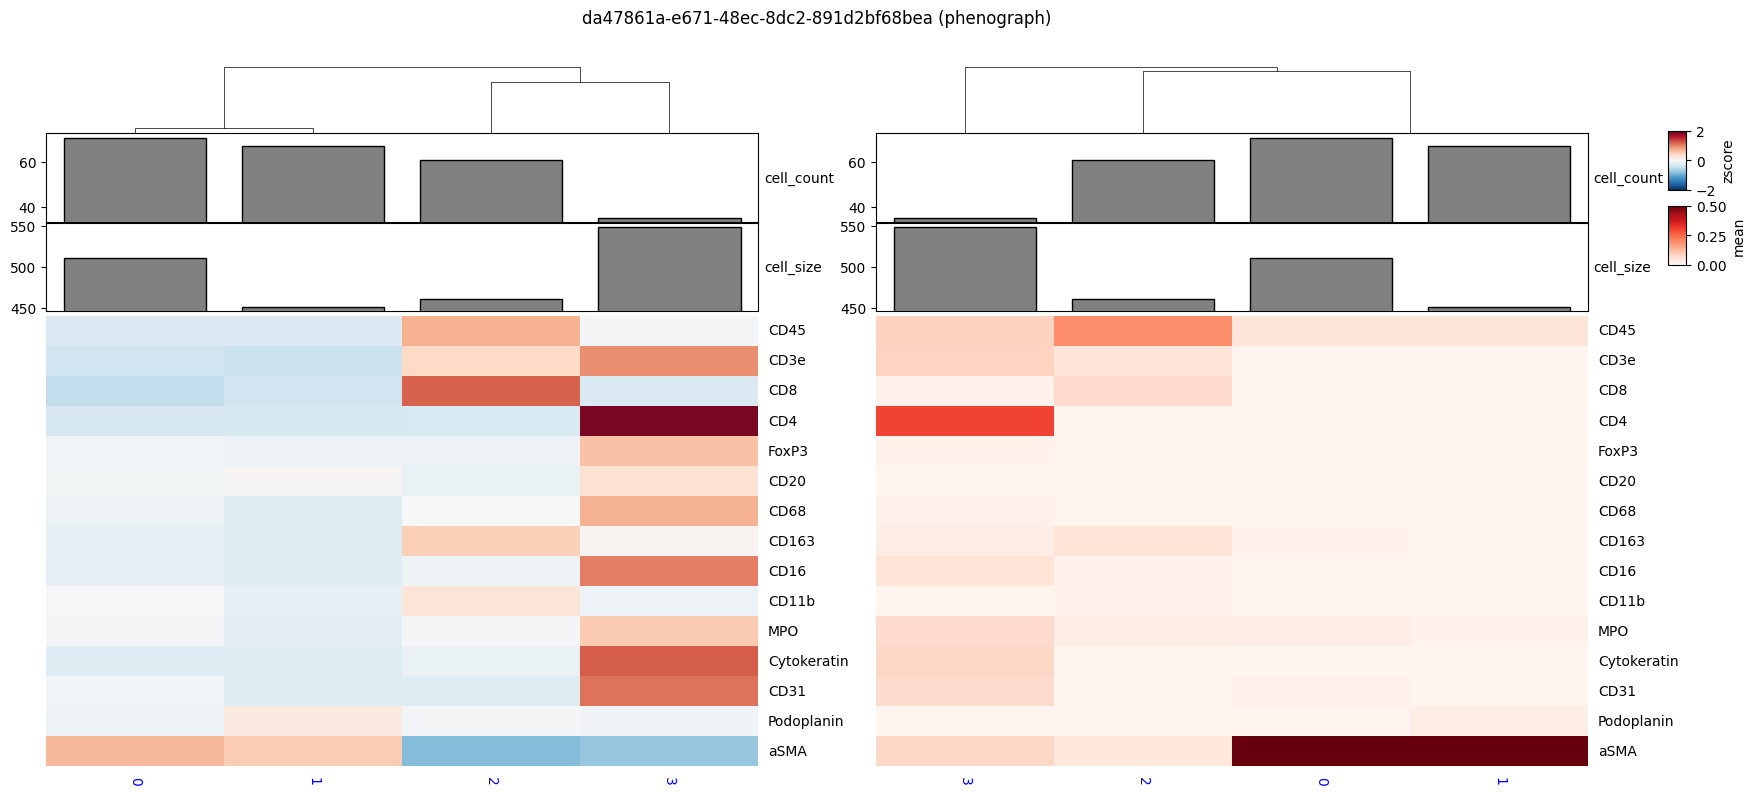

In [18]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [19]:
# add annotation
clustering_result.add_annotation(
    {"0": "Muscle-like", "1": "Muscle-like", "2": "CD8T", "3": "CD4T"}
)

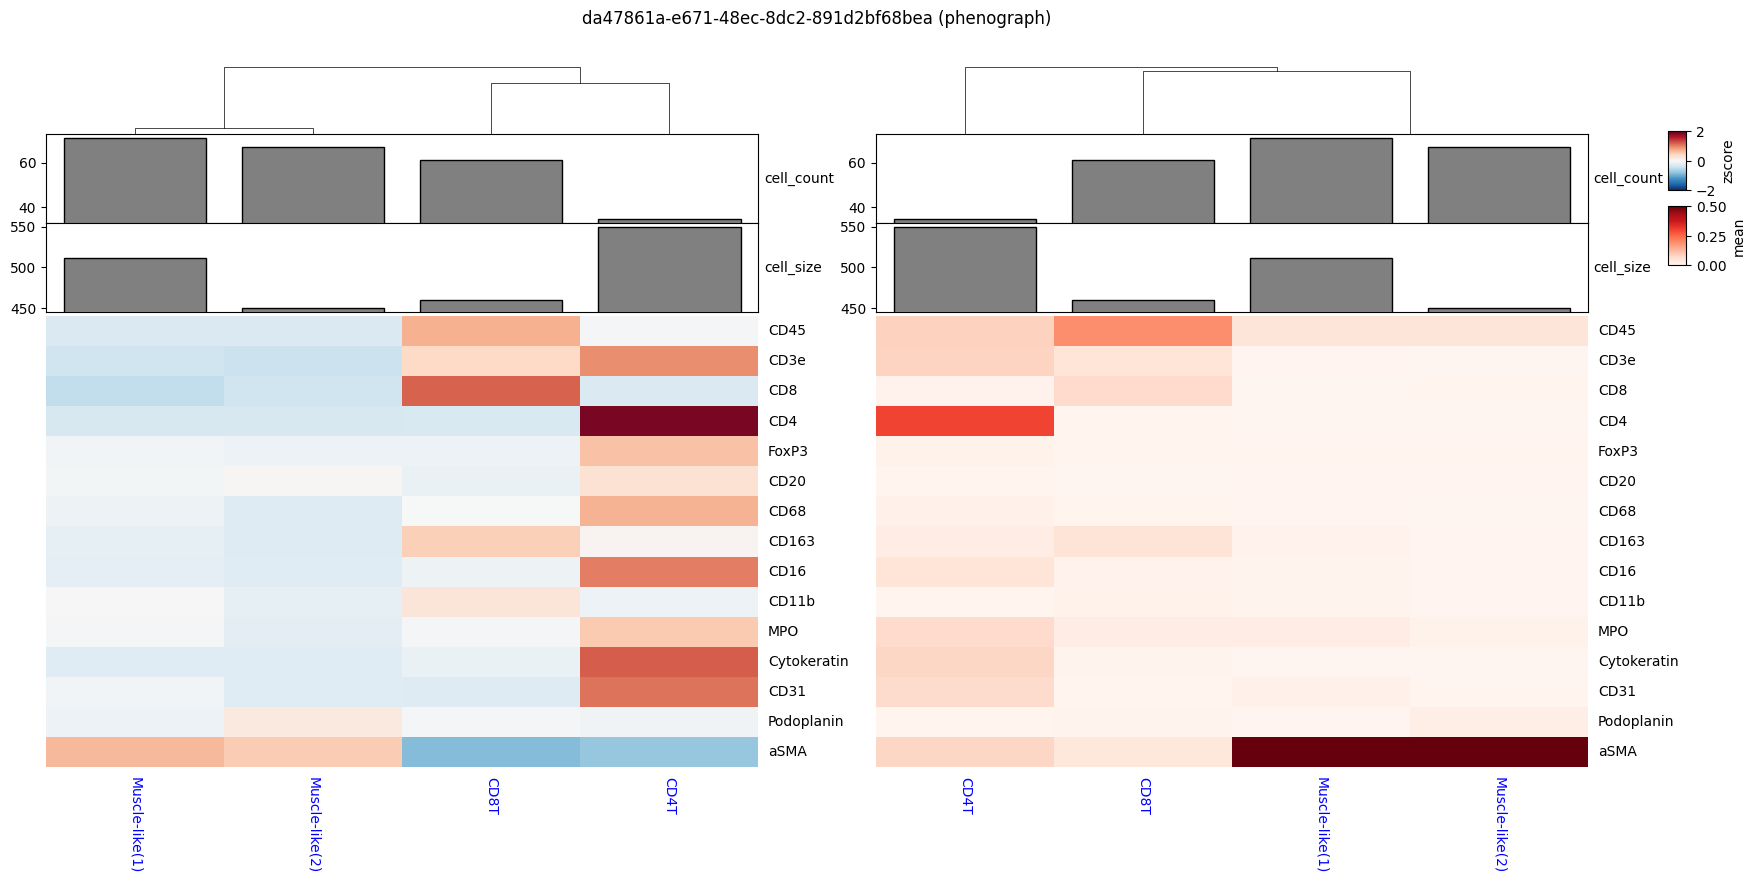

In [20]:
# plot heatmap with updated annotations
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="annotation",
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [21]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 2

In [ ]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# cells with no annotation need to be subclustered
len(manager.non_explicit_df)
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_B'").index
unit_ids

358

tag
T_B    358
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c11',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c13',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c14',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c15',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c17',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c18',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c25',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c26',
       ...
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1710',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1712',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1715',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1727',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1735',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1737',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1742',
       'RCC-TMA609(reg_4x

In [23]:
# clustering using phenograph with T and B markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_t + markers_b,
    method="phenograph",
    method_params={"k": 50},
)


Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.014883756637573242 seconds
Jaccard graph constructed in 0.2542755603790283 seconds
Wrote graph to binary file in 0.005741596221923828 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.669439
After 2 runs, maximum modularity is Q = 0.671336
Louvain completed 22 runs in 0.1328737735748291 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.6467452049255371 seconds


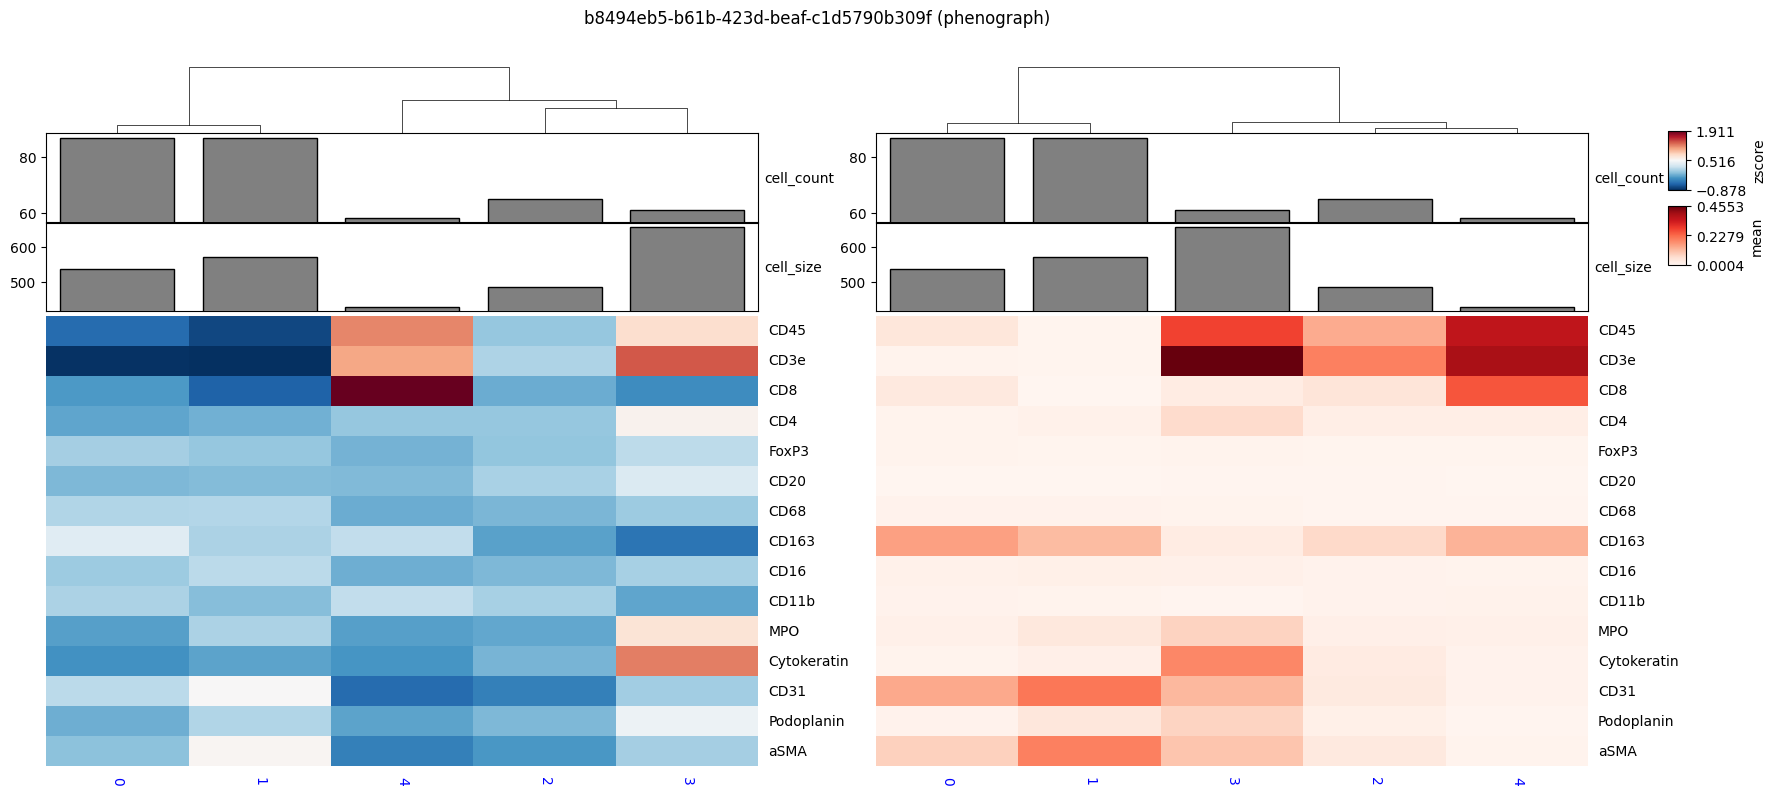

In [24]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
)


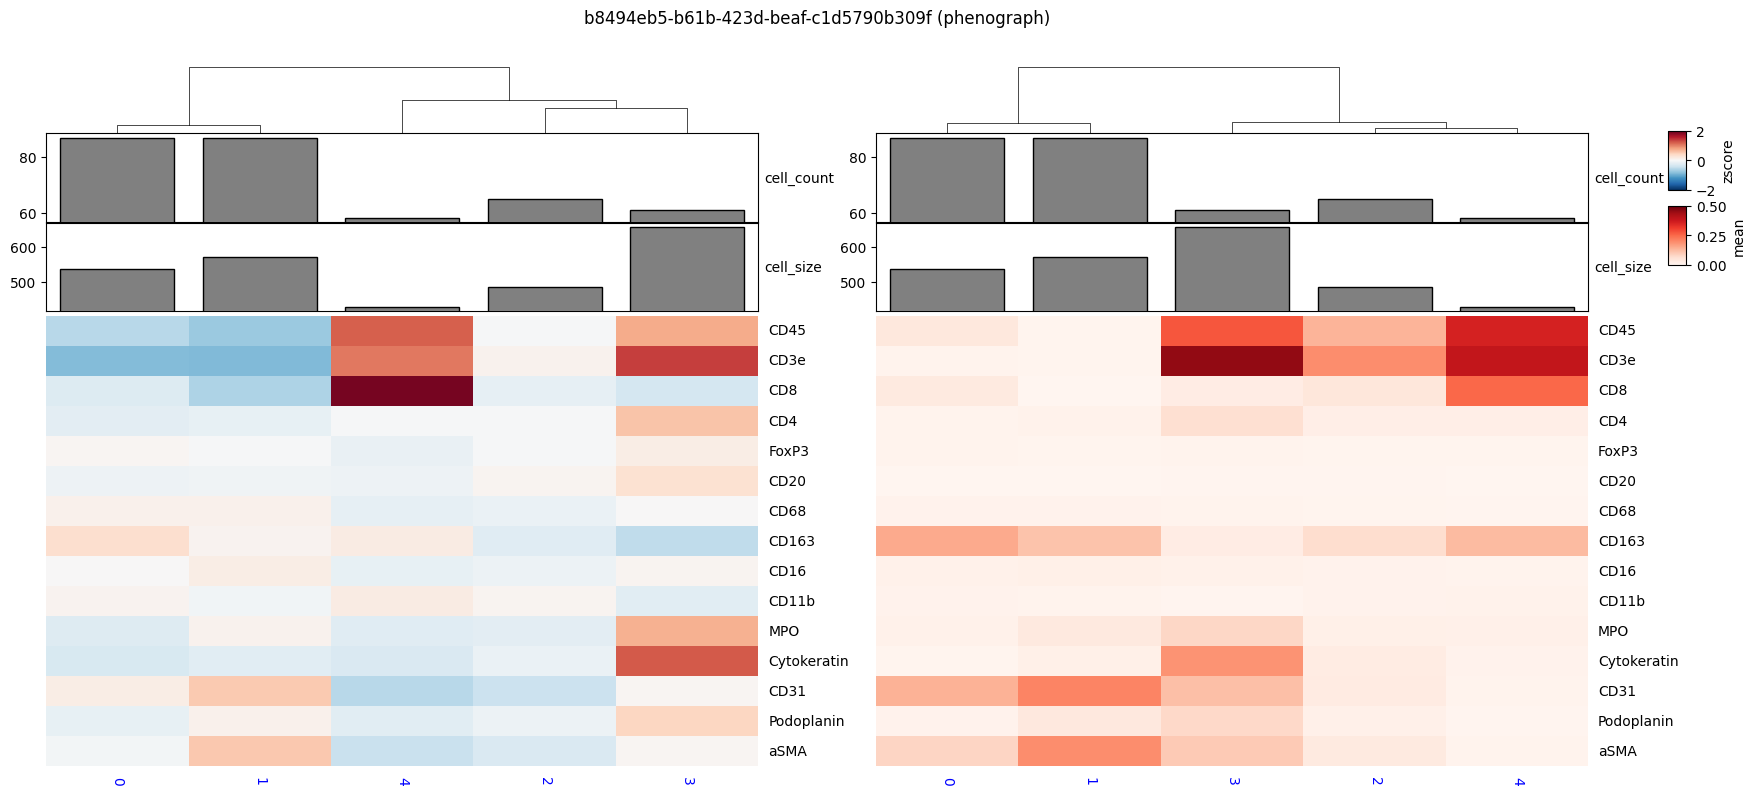

In [25]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [26]:
# add annotation and tag
clustering_result.add_annotation(
    {"0": "Macrophage", "1": "Muscle-like", "2": "CD8T", "4": "T"}
)

clustering_result.add_tag(
    {"3": "T_Epi"},
    tag_name="tag",
)

# or add tag with another tag name
clustering_result.add_tag(
    {"3": "T_Epi_2"},
    tag_name="tag_2",
)


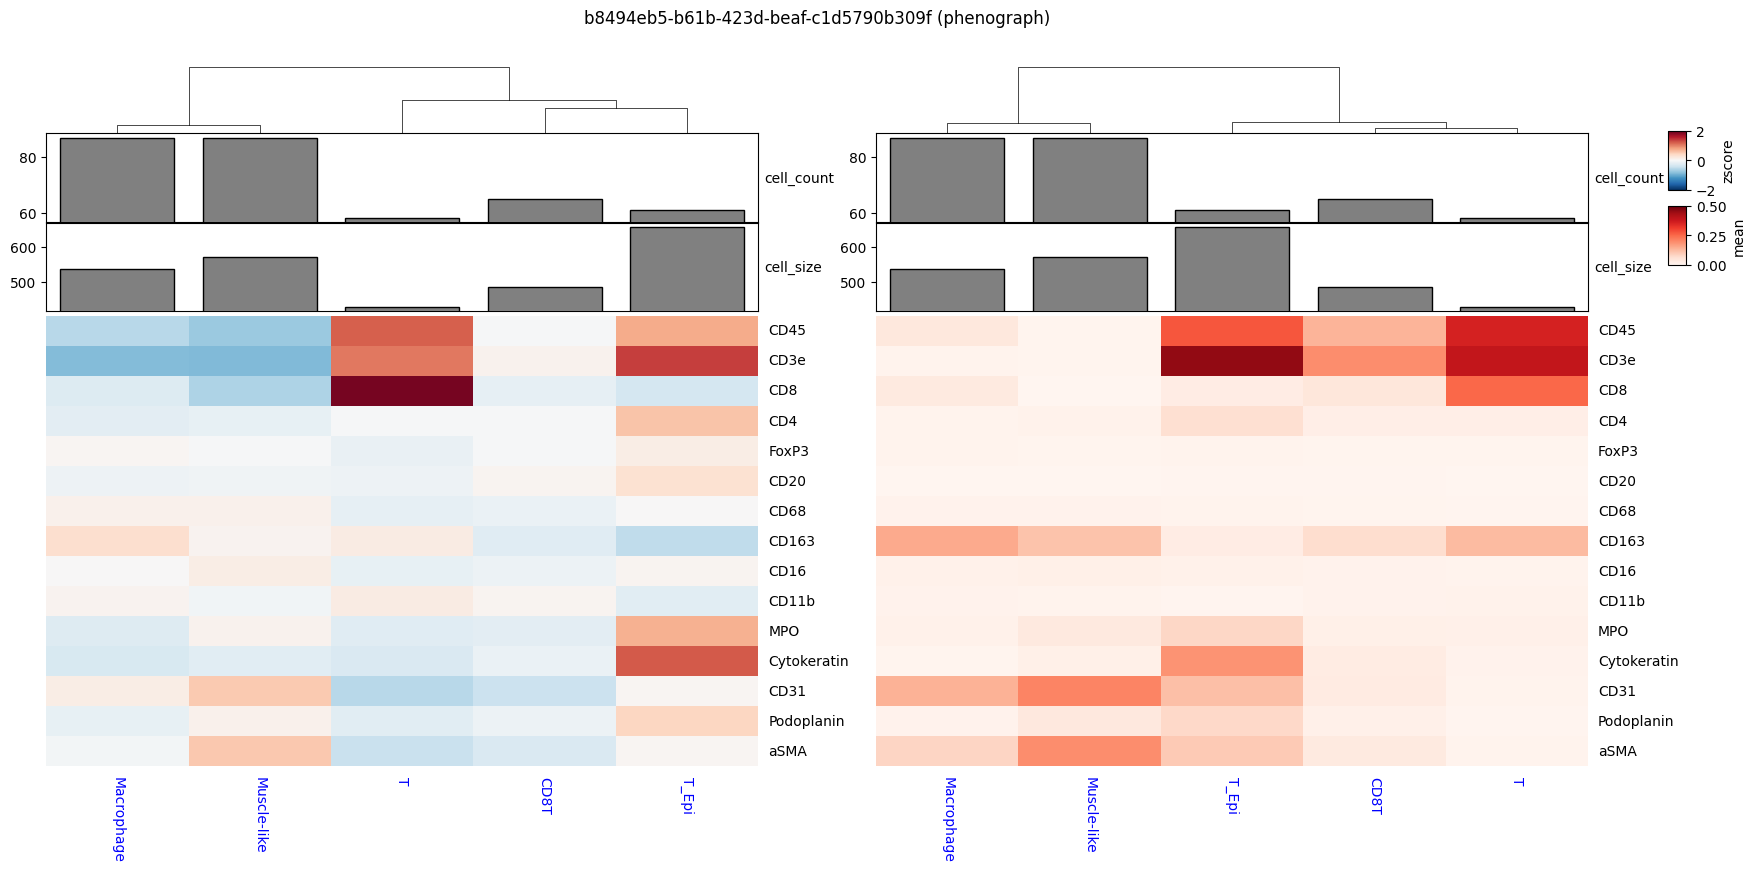

In [27]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


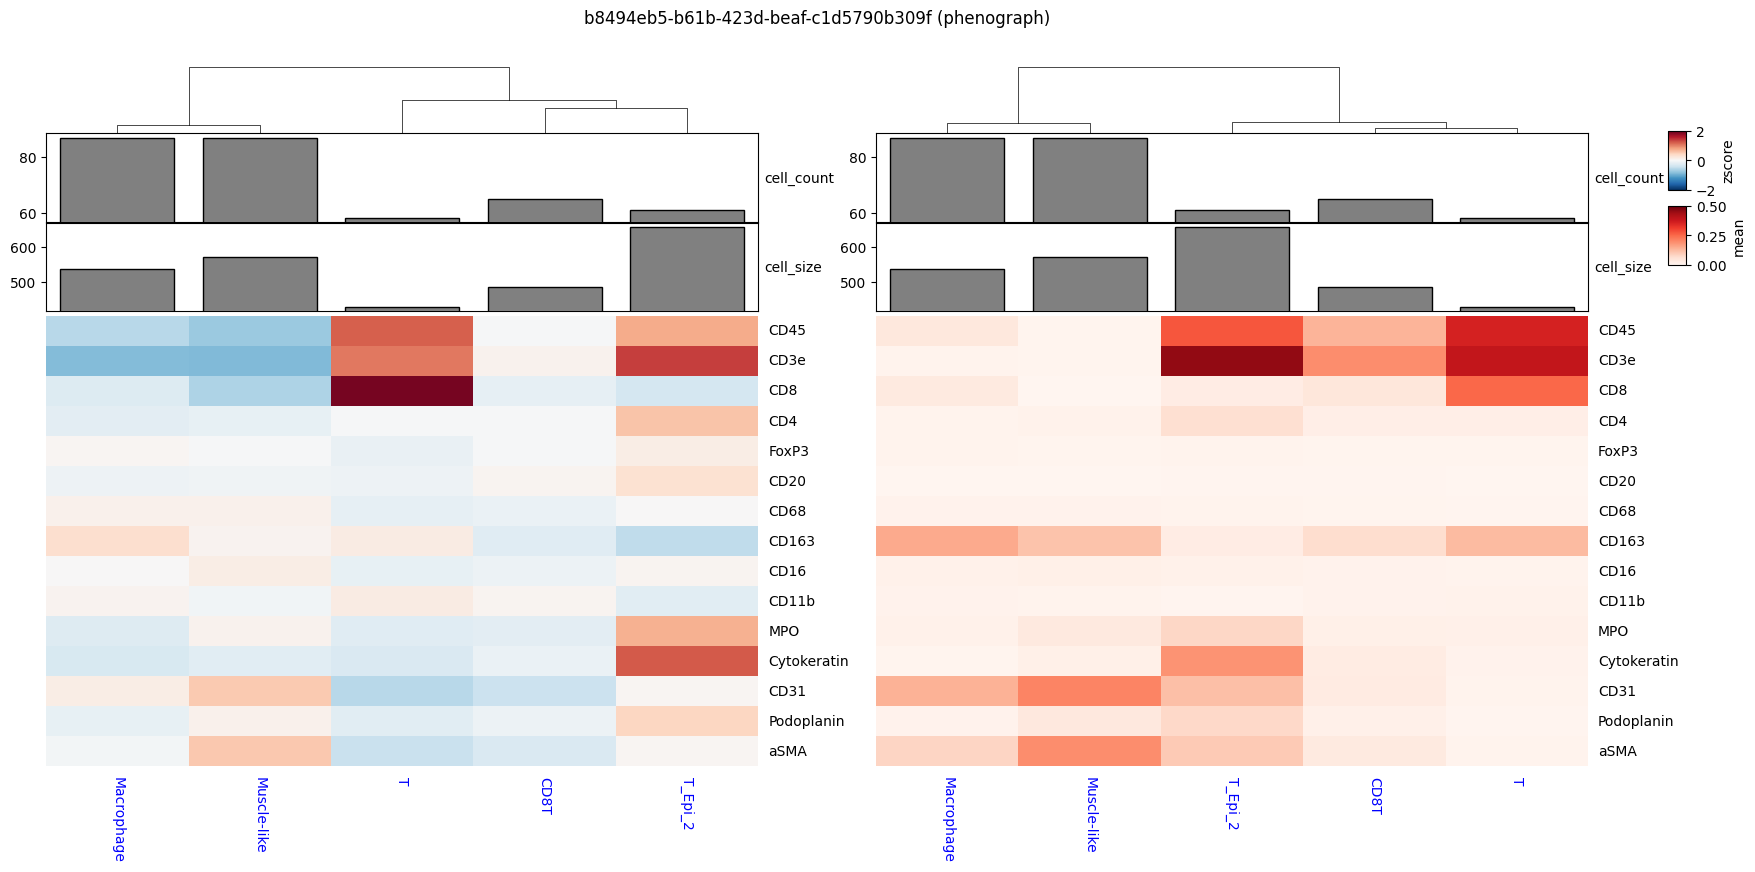

In [28]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag_2",
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [29]:
clustering_result.save(output_dir)

# Subclustering 3

In [30]:
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)
manager.non_explicit_df.tag.value_counts()

unit_ids = manager.non_explicit_df.query("tag == 'T_B|T_Epi'").index

tag
T_B|T_Epi    61
Name: count, dtype: int64

In [31]:
# clustering using phenograph with T and Cytokeratin
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_t + ["Cytokeratin"],
    method="phenograph",
    method_params={"k": 10},
)


Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.014981508255004883 seconds
Jaccard graph constructed in 0.26415538787841797 seconds
Wrote graph to binary file in 0.001104593276977539 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.624715
Louvain completed 21 runs in 0.07761740684509277 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.614189624786377 seconds


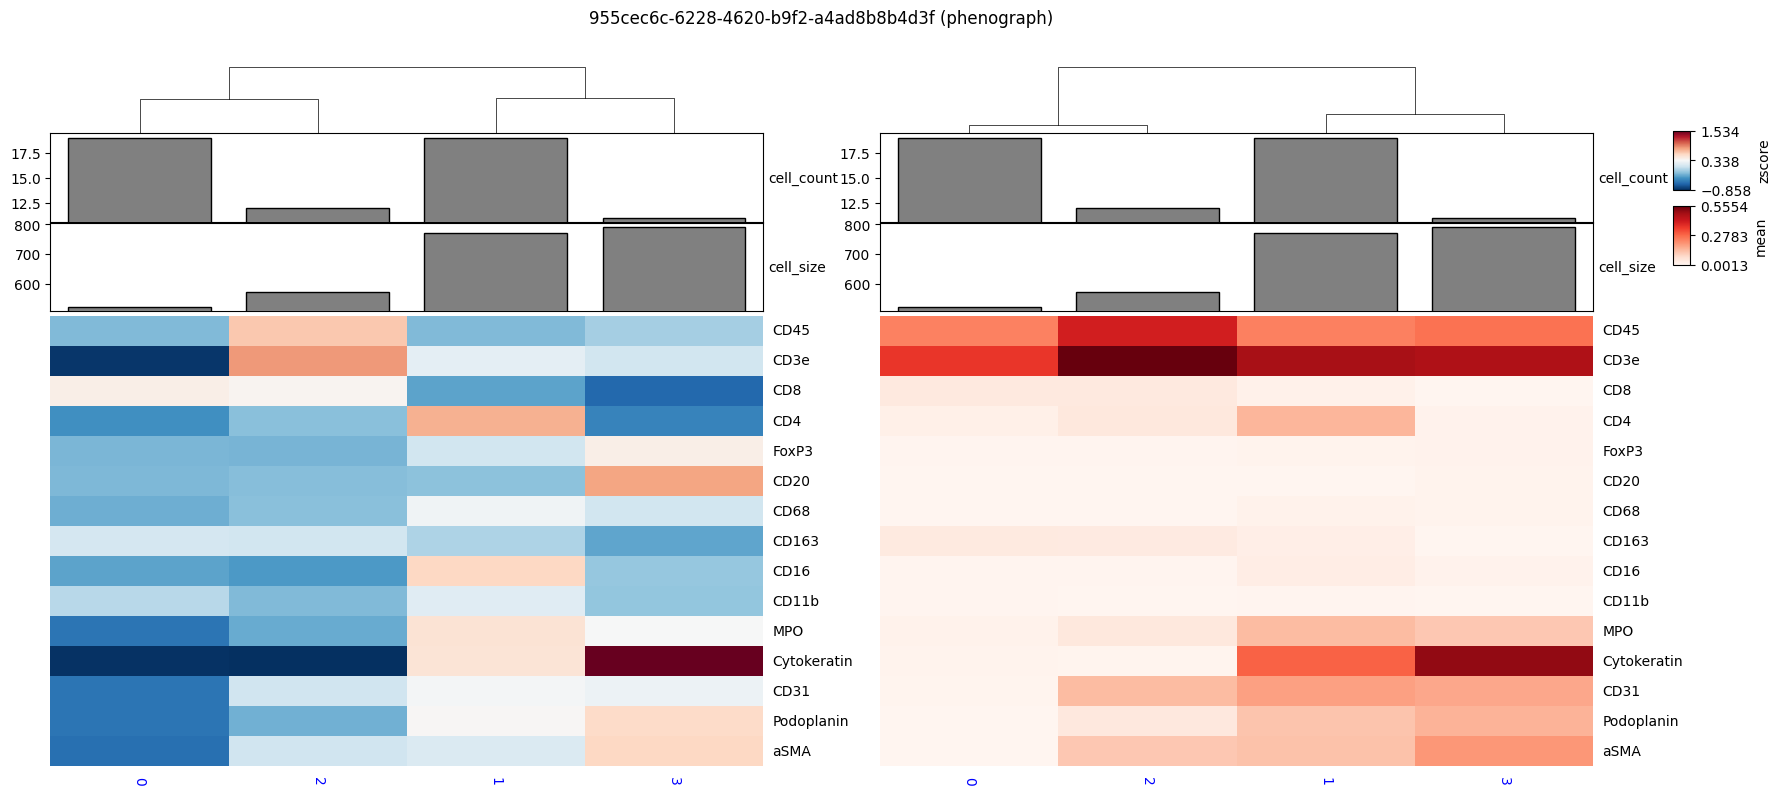

In [32]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
)


In [33]:
clustering_result.add_annotation(
    {"0": "T", "2": "T", "1": "Epithelial", "3": "Epithelial"}
)

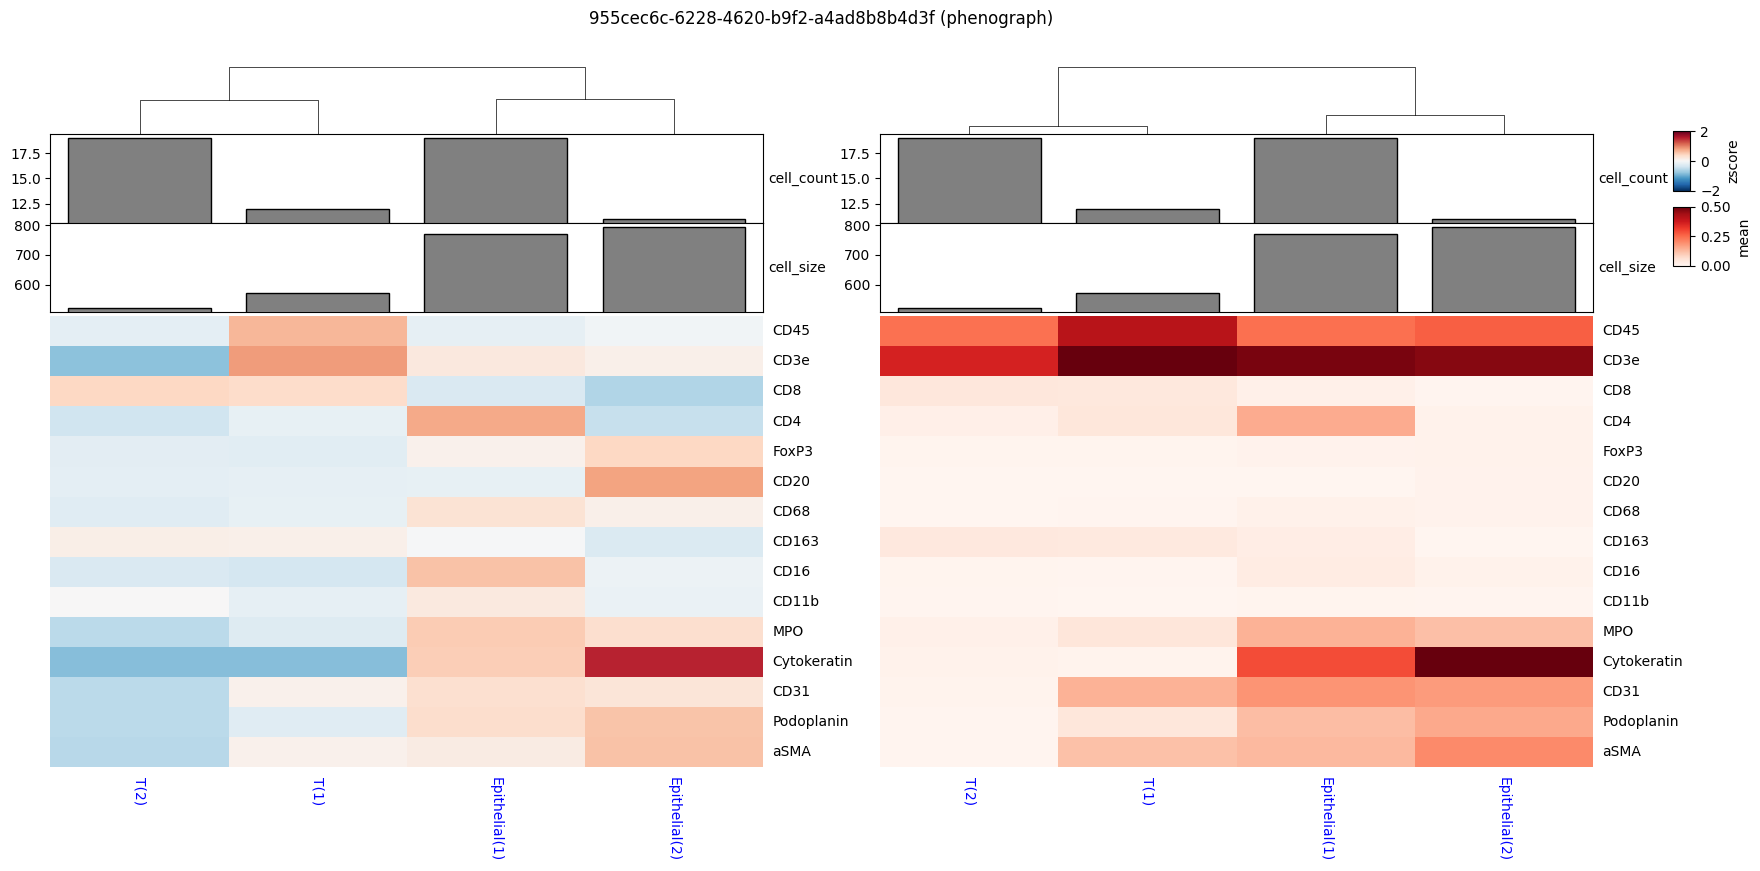

In [34]:
# plot heatmap with value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="annotation",
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)


In [35]:
clustering_result.save(output_dir)

# Final Heatmap


In [36]:
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)
len(manager.non_explicit_df)

0

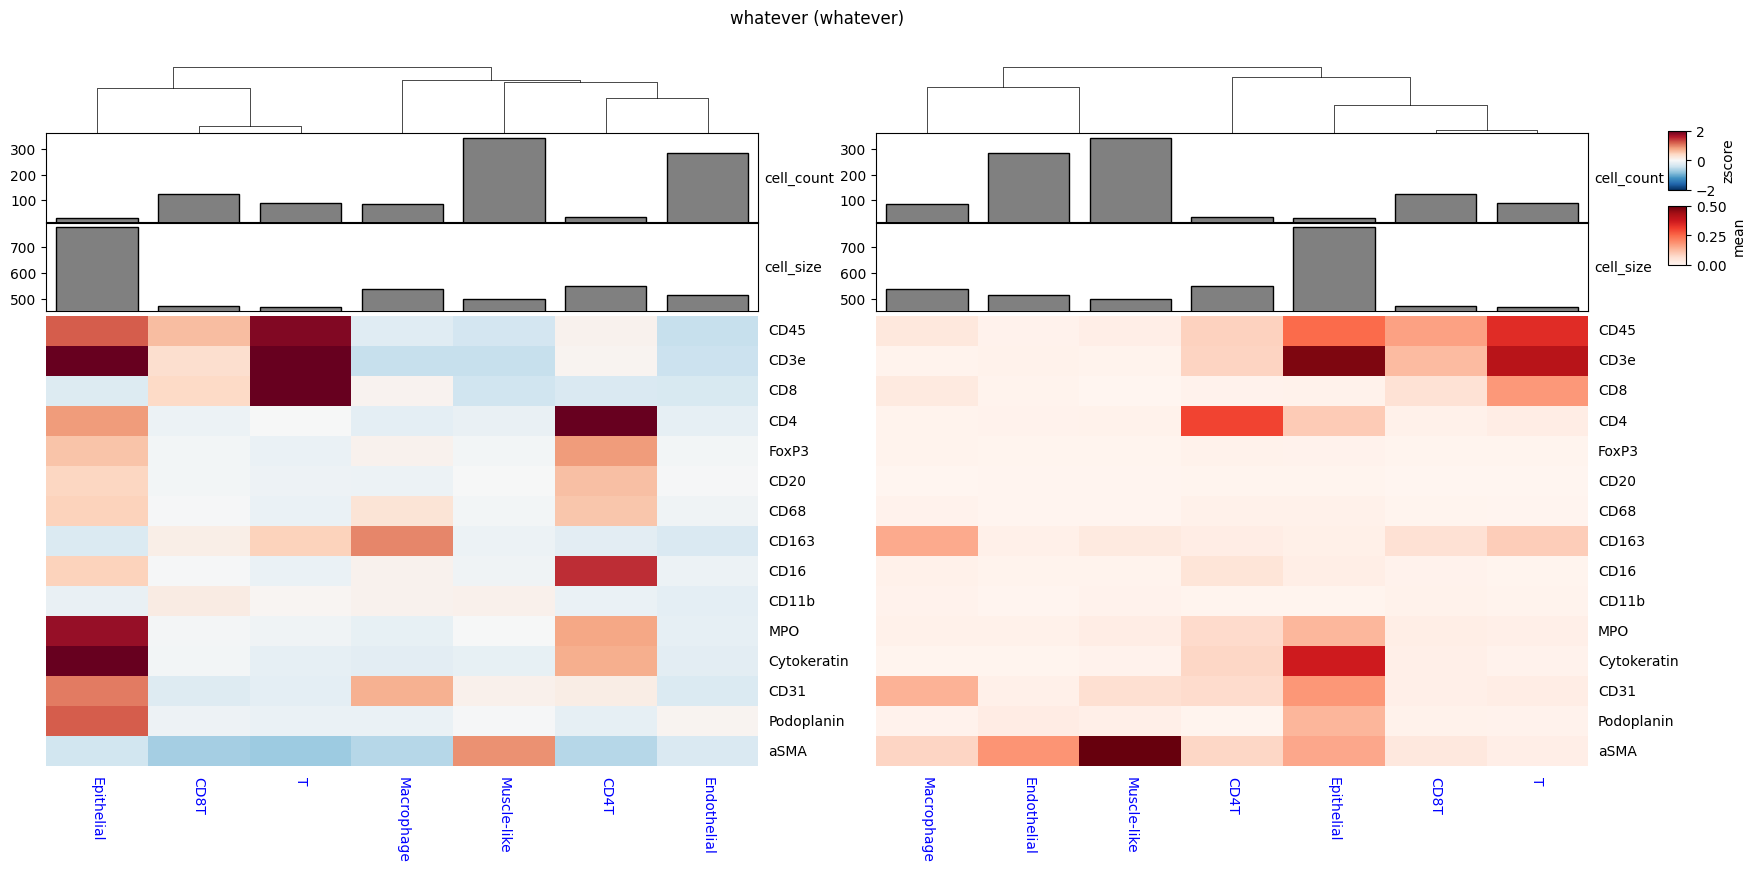

In [37]:
result = ClusteringResult(
    clustering_id="whatever",
    method="whatever",
    unit_ids=manager.summary_df.index,
    cluster_ids=manager.summary_df.annotation,
)
plot_clustering_heatmap_2(
    adata,
    result,
    features,
    figsize=(20, 8),
    kwargs_zscore={"vmin": -2, "center": 0, "vmax": 2},
    kwargs_mean={"vmin": 0, "vmax": 0.5},
)
